# Classification Regression using Machine Learning

### In this lab, we will use multiple classification algorithm on the same dataset to see the output produced by each algorithm and choose the appropriate one for our use.

Initialise and import packages/libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load & Validate the dataset 

Once loaded, run the dataset and check whether its loaded correctly or not.

In [2]:
train = pd.read_csv('D:/Course/Material/Notebook/Machine Learning/Data/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Validating Data Types and Missing Value Operation

There are numerous operations can be performed once the dataset is loaded. To start with pre-processing of data:

    1. Check which column/feature is important/relevant to train the Algorithm
    2. Identify the missing values and replace it using Mean or most repetative values

In [7]:
train['Age'].dtype

dtype('float64')

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Identify the Strings / Numeric columns

In [10]:
tex 

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [9]:
tex = []
num = []
for i in train.columns:
    if train[i].dtype == object:
        tex.append(i)
    else:
        num.append(i)
        

In [11]:
num

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Missing value operations

In [12]:
train['Age'].fillna(train['Age'].mean(),inplace = True)

In [13]:
train['Age'].isnull().sum()

0

In [14]:
df = train[['Cabin', 'Embarked']]
train[['Cabin1', 'Emabarked1']] =df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [15]:
train['Emabarked1'].isnull().sum()

0

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin1           0
Emabarked1       0
dtype: int64

Replacing missing value with repetitive values

In [17]:
train[['Cabin', 'Embarked']] =df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [18]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Cabin1         0
Emabarked1     0
dtype: int64

In [19]:
train  = train.drop(['Cabin1', 'Emabarked1'],axis=1)

In [20]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Create Boxplot using Matplotlib

This will help in identifying the outliers. Also we can identify the quertile values to find out the Maxima and Minima

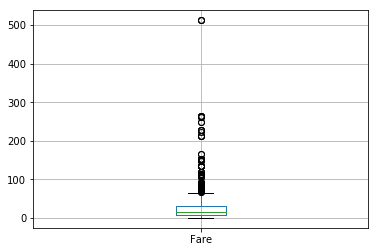

In [21]:
train.boxplot(column ='Fare')

In [22]:
import numpy as np

In [23]:
qr75, qr25 = np.percentile(train['Fare'],[75,25])

In [24]:
iqr = qr75 - qr25

In [25]:
iqr

23.089600000000001

In [26]:
minima = qr25 - 1.5 *iqr
maxima = qr75 + 1.5 *iqr

In [27]:
train['Out_yes'] = 0

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Out_yes
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S,0


If the Value is Less than Minima or Greater than Maxima , then its Outlier

In [29]:
train.loc[train['Fare'] < minima, 'Out_yes'] = 1

In [30]:
train.loc[train['Fare'] > maxima, 'Out_yes'] = 1

In [31]:
train['Out_yes'].value_counts()

0    775
1    116
Name: Out_yes, dtype: int64

In [32]:
train[train['Out_yes'] == 1]['Fare'].reset_index()

,index,Fare
0,1,71.2833
1,27,263.0000
2,31,146.5208
3,34,82.1708
4,52,76.7292
5,61,80.0000
6,62,83.4750
7,72,73.5000
8,88,263.0000
9,102,77.2875


### One Hot Encoding

The One Hot encoding is required for the Machine to understand and process the values. As you can see here, the column Embarked has been coded into C , Q , S columns as per their values

In [33]:
df = pd.get_dummies(train['Embarked'])
train  = pd.concat([train,df],axis=1)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Out_yes,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S,0,0,0,1


In [35]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Perform the same operation of the Sex of the People

In [36]:
train['Sex2'] = train['Sex'].map({'female':0,'male':1})

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Out_yes,C,Q,S,Sex2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,0,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S,0,0,0,1,1


In [38]:
train = train.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked','Out_yes', 'C','Q', 'S', ],axis=1)

In [39]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex2'], dtype='object')

### Identify the Dependent and Independent variable

Store the Input and Output variables in X and Y columns. We are starting the machine learning process here by splitting the dataset and then train the model.
Once the model is trained using training dataset we need to feed in test dataset to predict the outcomes using trained model

In [40]:
y = train.iloc[:,0]
X = train.iloc[:,1:]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2,random_state = 42)

In [42]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex2
331,1,45.500000,0,0,28.5000,1
733,2,23.000000,0,0,13.0000,1
382,3,32.000000,0,0,7.9250,1
704,3,26.000000,1,0,7.8542,1
813,3,6.000000,4,2,31.2750,0
118,1,24.000000,0,1,247.5208,1
536,1,45.000000,0,0,26.5500,1
361,2,29.000000,1,0,27.7208,1
29,3,29.699118,0,0,7.8958,1
55,1,29.699118,0,0,35.5000,1


In [43]:
y_train

331    0
733    0
382    0
704    0
813    0
118    0
536    0
361    0
29     0
55     1
865    1
595    0
239    0
721    0
81     1
259    1
486    1
716    1
800    0
781    1
542    0
326    0
534    0
535    1
483    1
762    1
533    1
713    0
390    1
495    0
      ..
276    0
191    0
385    0
805    0
413    0
491    0
343    0
769    0
308    0
661    0
130    0
663    0
871    1
99     0
372    0
87     0
458    1
330    1
214    0
466    0
121    0
614    0
20     0
700    1
71     0
106    1
270    0
860    0
435    1
102    0
Name: Survived, dtype: int64

### Start using the Machine Learning Model

##### 1. RandomForestClassifier Model

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier()

In [46]:
rfc_model = rfc.fit(X_train,y_train)

In [47]:
y_pred = rfc_model.predict(X_test)

#### Metrics Generation

When the model is trained and tested, there should be mechanism to identify how fare it has done. 
This can be achieved by generating metrics and compare with the benchmark to identify the efficacy of the model

In [48]:
from sklearn.metrics import accuracy_score

Metrics generated by the RFC model

In [49]:
accuracy_score(y_test,y_pred)

0.8044692737430168

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred).T

array([[91, 21],
       [14, 53]])

In [51]:
54/(54+13)

0.8059701492537313

In [52]:
from sklearn.metrics import precision_score

In [53]:
precision_score(y_test,y_pred)

0.79104477611940294

In [54]:
from sklearn.metrics import recall_score

In [55]:
recall_score(y_test,y_pred)

0.71621621621621623

To see , which feature or column has most importance in predicting the data using model

In [56]:
rfc.feature_importances_

array([ 0.08598101,  0.24515922,  0.05591759,  0.03959733,  0.29439401,
        0.27895084])

In [57]:
for i in zip(X_train.columns,rfc.feature_importances_):
    print (i)

('Pclass', 0.085981005771877089)
('Age', 0.24515922272103507)
('SibSp', 0.055917588947595152)
('Parch', 0.039597328198265849)
('Fare', 0.29439401180376112)
('Sex2', 0.27895084255746566)


##### 2. Logistic Regression Model

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="newton-cg")
y_pred_lg = lr.fit(X_train,y_train).predict(X_test)
accuracy_score(y_test,y_pred_lg)

0.81005586592178769

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [71]:
ld = LinearDiscriminantAnalysis(solver = "svd")
y_pred_ld = ld.fit(X_train,y_train).predict(X_test)
accuracy_score(y_test,y_pred_ld)

0.78770949720670391

In [73]:
qd = QuadraticDiscriminantAnalysis()
y_pred_qd = qd.fit(X_train,y_train).predict(X_test)
accuracy_score(y_test,y_pred_ld)

0.78770949720670391

##### 3. KNN Classifier Model

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
kn = KNeighborsClassifier(n_neighbors=1)
y_pred_kn= kn.fit(X_train,y_train).predict(X_test)
accuracy_score(y_test,y_pred_kn)

0.68715083798882681

##### 4. Decision Tree Model

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth =2)
y_pred_dt= dt.fit(X_train,y_train).predict(X_test)
accuracy_score(y_test,y_pred_dt)


0.76536312849162014

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth =2)
y_pred_dt= dt.fit(X_train,y_train).predict(X_test)
accuracy_score(y_test,y_pred_dt)


0.76536312849162014

In [ ]:
from sklearn.tree import export_graphviz

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gt = GradientBoostingClassifier(max_depth =2)
y_pred_gt= gt.fit(X_train,y_train).predict(X_test)
accuracy_score(y_test,y_pred_gt)

0.81005586592178769

##### 5. AdaBoostClassifier Model

In [89]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
y_pred_ad= ad.fit(X_train,y_train).predict(X_test)
accuracy_score(y_test,y_pred_ad)

0.7988826815642458